## 1. 머신 러닝 (50점)
데이터 설명 : 학생의 결석횟수 등급을 예측하기 위한 예제 데이터이다.

In [1]:
import pandas as pd
raw_df = pd.read_csv('./../data/28_problem1.csv')
raw_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,traveltime,studytime,failures,paid,activities,famrel,freetime,absences_grade
0,GP,F,18,U,GT3,A,4,4,course,mother,2,2,0,no,no,4,3,3.0
1,GP,F,17,U,GT3,T,1,1,course,father,1,2,0,no,no,5,3,2.0
2,GP,F,15,U,LE3,T,1,1,other,mother,1,2,3,yes,no,4,3,4.0
3,GP,F,15,U,GT3,T,4,2,home,mother,1,3,0,yes,yes,3,2,1.0
4,GP,F,16,U,GT3,T,3,3,home,father,1,2,0,yes,no,4,3,2.0


In [2]:
df = raw_df.copy()
target_col = 'absences_grade'

In [3]:
# 1. 데이터 전처리 및 시각화

In [4]:
# 1-1. EDA를 진행하고, 차원축소의 필요성이 있는지 판단하시오.
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# General EDA

In [6]:
'''
1. absences_grade에 Null 값이 존재한다.
    -> 이후 결측치 처리를 해주어야 한다.
    -> 다만, target column에 결측치가 존재하는 경우이기 때문에, 해당 행을 삭제하는 것이 좋을 수 있다.
    
2. 상당히 많은 object type의 데이터가 존재한다.
    이는 이후 인코딩 처리를 해주어야하는데, 이 과정에서 차원이 증가할 수 있다.
    따라서, 차원축소의 필요할 수 도 있다.
''' 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school          395 non-null    object 
 1   sex             395 non-null    object 
 2   age             395 non-null    int64  
 3   address         395 non-null    object 
 4   famsize         395 non-null    object 
 5   Pstatus         395 non-null    object 
 6   Medu            395 non-null    int64  
 7   Fedu            395 non-null    int64  
 8   reason          395 non-null    object 
 9   guardian        395 non-null    object 
 10  traveltime      395 non-null    int64  
 11  studytime       395 non-null    int64  
 12  failures        395 non-null    int64  
 13  paid            395 non-null    object 
 14  activities      395 non-null    object 
 15  famrel          395 non-null    int64  
 16  freetime        395 non-null    int64  
 17  absences_grade  380 non-null    flo

In [7]:
'''
Numeric data는 대체로 유사한 scale을 가지고 있다.
'''
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,absences_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,380.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,2.184211
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.424536
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,1.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,3.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000


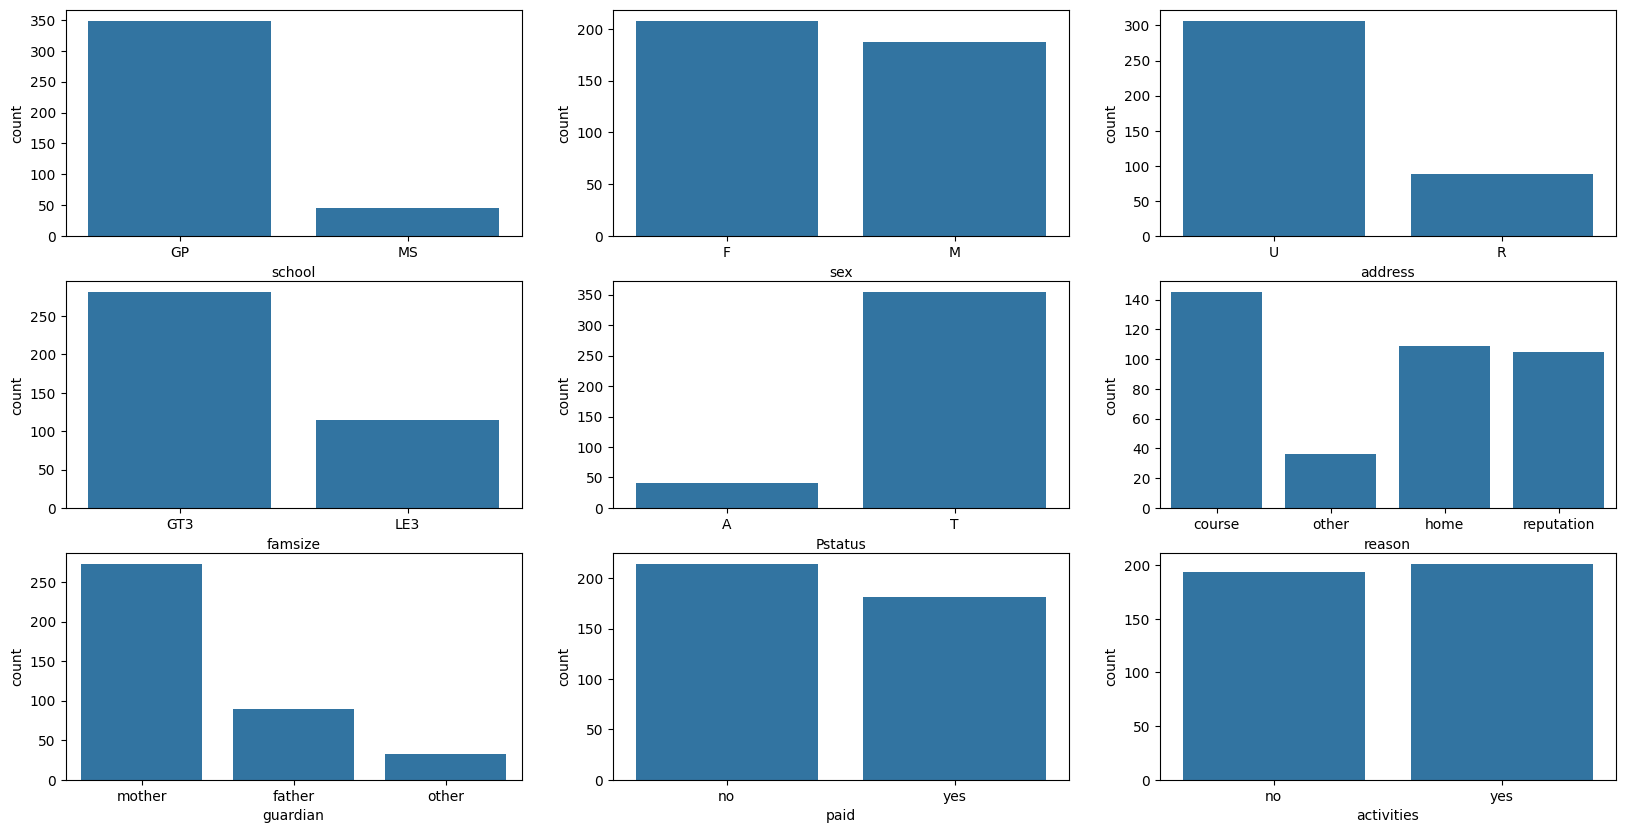

In [8]:
# Object type data EDA
# 기본적으로 모든 데이터는 서열형 보다는 명목형에 가까운 성향을 띄고 있다.
# 따라서 one-hot encoding을 통해 처리하는 것이 좋아 보인다.

object_columns = df.select_dtypes(include='object').columns
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for idx, object_column in enumerate(object_columns):
    row, col = idx // 3, idx % 3
    sns.countplot(x=object_column, data=df, ax=axes[row, col])

<Axes: >

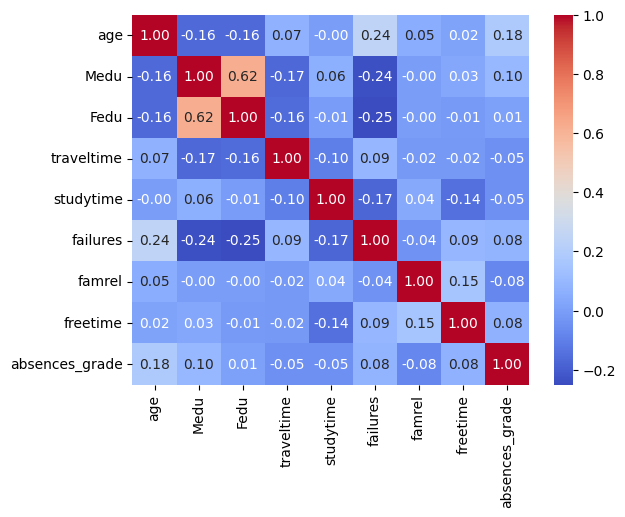

In [9]:
# Object type data EDA
# 특별히 상관관계가 유의미한 것으로 보이는 데이터는 없어 보인다.
number_cols = df.select_dtypes(include='number').columns

sns.heatmap(df.loc[:, number_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [10]:
# 1-2. 데이터 품질을 개선할 수 있는 방법을 제안하고 데이터세트를 재생성하시오.
# 1. object type one-hot encoding
df = pd.concat([
    df.drop(object_columns, axis=1),
    pd.get_dummies(df[object_columns]).astype(int)
], axis=1)

# 2. 결측치 처리
# -> 결측치를 보간할 수도 있지만, target column에 결측치가 존재하는 경우이므로 해당 행을 삭제하는 것이 좋아 보인다.
df = df[df['absences_grade'].notna()]

In [11]:
# 1-3. (2)에서 제시한 방법이 데이터 과적합이 된다는 가정하에 과적합을 해결할 수 있는 2가지 방안을 제시하고 각 방법의 장단점을 기술하시오.
'''
1. 차원축소
    : 차원축소를 통해 데이터의 차원을 줄이는 방법이다.
    장점
        - 차원이 줄어들면서, 학습 속도가 빨라진다.
        - 차원이 줄어들면서, 모델의 복잡도가 줄어들어 과적합을 방지할 수 있다.
    단점
        - 차원이 줄어들면서, 데이터의 정보가 손실될 수 있다.
        - 차원이 줄어들면서, 모델의 성능이 낮아질 수 있다.

2. Regularization
    : Regularization을 통해 모델의 복잡도를 줄이는 방법이다.
    장점
        - 모델의 복잡도를 줄이면서, 과적합을 방지할 수 있다.
        - 모델의 성능을 유지하면서, 과적합을 방지할 수 있다.
    단점
        - Regularization의 하이퍼파라미터를 잘 설정해야 한다.
        - Regularization의 하이퍼파라미터를 설정하는 것이 어려울 수 있다.

3. 교차검증
    : 교차검증을 통해 모델의 성능을 평가하는 방법이다.
    장점
        - 모델의 성능을 정확하게 평가할 수 있다.
        - 모델의 성능을 개선할 수 있다.
    단점
        - 모델의 학습 시간이 증가할 수 있다.
        - 모델의 학습 시간이 증가하면서, 모델의 복잡도가 증가할 수 있다.
'''

'\n1. 차원축소\n    : 차원축소를 통해 데이터의 차원을 줄이는 방법이다.\n    장점\n        - 차원이 줄어들면서, 학습 속도가 빨라진다.\n        - 차원이 줄어들면서, 모델의 복잡도가 줄어들어 과적합을 방지할 수 있다.\n    단점\n        - 차원이 줄어들면서, 데이터의 정보가 손실될 수 있다.\n        - 차원이 줄어들면서, 모델의 성능이 낮아질 수 있다.\n\n2. Regularization\n    : Regularization을 통해 모델의 복잡도를 줄이는 방법이다.\n    장점\n        - 모델의 복잡도를 줄이면서, 과적합을 방지할 수 있다.\n        - 모델의 성능을 유지하면서, 과적합을 방지할 수 있다.\n    단점\n        - Regularization의 하이퍼파라미터를 잘 설정해야 한다.\n        - Regularization의 하이퍼파라미터를 설정하는 것이 어려울 수 있다.\n\n3. 교차검증\n    : 교차검증을 통해 모델의 성능을 평가하는 방법이다.\n    장점\n        - 모델의 성능을 정확하게 평가할 수 있다.\n        - 모델의 성능을 개선할 수 있다.\n    단점\n        - 모델의 학습 시간이 증가할 수 있다.\n        - 모델의 학습 시간이 증가하면서, 모델의 복잡도가 증가할 수 있다.\n'

In [12]:
# 2. 데이터 분석

In [13]:
# 2-1. 데이터세트를 기준으로 random forest, neural network, lighgbm 3가지 방식으로 
# 학교 결석 횟수 등급을 예측하는 모델을 만들고, f1 score로 모델을 평가하시오.

In [14]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop(columns=[target_col])
y = df[target_col]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_number_cols = number_cols.difference([target_col])

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[feature_number_cols] = scaler.fit_transform(X_train_scaled.loc[:, feature_number_cols])

X_test_scaled = X_test.copy()
X_test_scaled[feature_number_cols] = scaler.transform(X_test_scaled.loc[:, feature_number_cols])

In [15]:
import time

In [16]:
model_result_dict = dict()

In [17]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
total_time = time.time() - start

model_result_dict['RandomForest'] = {
    'f1_score': f1_score(y_test, y_pred, average='micro'),
    'time': total_time
}

In [18]:
from sklearn.neural_network import MLPClassifier

start = time.time()
model = MLPClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
total_time = time.time() - start

model_result_dict['NeuralNet'] = {
    'f1_score': f1_score(y_test, y_pred, average='micro'),
    'time': total_time
}

/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
from lightgbm import LGBMClassifier

start = time.time()
model = LGBMClassifier(random_state=42,verbosity=-1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
total_time = time.time() - start

model_result_dict['LightGBM'] = {
    'f1_score': f1_score(y_test, y_pred, average='micro'),
    'time': total_time
}

In [20]:
# 2-2. Hard Voting, Soft Voting의 장단점을 설명하고 2-1의 3가지 모델로 구현하시오.
# 그리고 두 방식의 f1-score를 비교하시오.

'''
Hard Voting : 최적의 성능을 내는 하나의 결과값을 선택하는 방식
    - 장점 : 각 모델의 예측값을 투표하여 최적의 성능을 내는 결과값을 선택할 수 있다.
    - 단점 : 다양한 결과값을 종합적으로 반영하지 못할 수 있다.
Soft Voting : 각 모델의 예측값을 평균내어 최적의 성능을 내는 결과값을 선택하는 방식
    - 장점 : 다양한 결과값을 종합적으로 반영할 수 있다.
    - 단점 : 최적의 모델이 있다는 가정하에 약간의 노이즈가 발생할 수 있다.
'''

from sklearn.ensemble import VotingClassifier


model1 = RandomForestClassifier(random_state=42)
model2 = MLPClassifier(random_state=42)
model3 = LGBMClassifier(random_state=42,verbosity=-1)

hard_voting_model = VotingClassifier(
    estimators=[('rf', model1), ('mlp', model2), ('lgbm', model3)],
    voting='hard'
)

soft_voting_model = VotingClassifier(
    estimators=[('rf', model1), ('mlp', model2), ('lgbm', model3)],
    voting='soft'
)
start = time.time()
hard_voting_model.fit(X_train_scaled, y_train)
y_pred_hard = hard_voting_model.predict(X_test_scaled)
hard_voting_time = time.time() - start

start = time.time()
soft_voting_model.fit(X_train_scaled, y_train)
y_pred_soft = soft_voting_model.predict(X_test_scaled)
soft_voting_time = time.time() - start

model_result_dict['HardVoting'] = {
    'f1_score': f1_score(y_test, y_pred_hard, average='micro'),
    'time': hard_voting_time
}

model_result_dict['SoftVoting'] = {
    'f1_score': f1_score(y_test, y_pred_soft, average='micro'),
    'time': soft_voting_time
}

/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# 2-3. 총 5개 모델(RF,NN,LGBM,Hard Voting, Soft Voting) 중 
# 실시간 온라인 시스템에 가장 적합한 모델과 선정이유를 객관적으로 제시하시오.
'''
실시간 온라인 시스템에 모델을 활용하기 위해서 평가해야할 주요 요소는 크게 두가지로 나눌 수 있다.
    1. 모델의 성능
        모델의 성능의 경우에는 hard voting 모델이 가장 높은 성능을 보였다.
        따라서, 성능을 기준으로 모델을 선택한다면 hard voting 모델을 선택하는 것이 좋다.
    2. 모델의 속도
        모델의 속도 같은 경우에는 Random Forest 모델이 가장 빠른 속도를 보였다.
        따라서, 속도를 기준으로 모델을 선택한다면 Random Forest 모델을 선택하는 것이 좋다.

성능과 속도의 중요성에 따라 선정하는 모델은 달라질 수 있으나, 이번 경우 속도를 조금 더 중요하게 생각한다는 가정하에 가장 적합한 모델은 Random Forest 모델이다.
'''
pd.DataFrame(model_result_dict).T


,f1_score,time
RandomForest,0.447368,0.060885
NeuralNet,0.447368,0.694761
LightGBM,0.421053,0.291691
HardVoting,0.473684,1.266630
SoftVoting,0.460526,1.360094


In [22]:
# 3. 데이터 모델링

In [23]:
# 3-1. 적정 모델과 선정 및 모델링 과정에서 추가적으로 고려해볼 만한 사항을 설명하시오.
'''
현재는 random forest 모델이 가장 속도 측면에서 우세하다고 판단하였다.
다만, 실제 서비스에 모델을 적용하기위해 파라미터 튜닝을 진행한다면, 모델 속도 측면의 장점이 상대적으로 줄어들 수 있다.

모델의 일반화 성능을 검증하기 위해서는 더 다양한 데이터와 cross validation을 통해 검증하는 것이 좋다.

'''

'\n현재는 random forest 모델이 가장 속도 측면에서 우세하다고 판단하였다.\n다만, 실제 서비스에 모델을 적용하기위해 파라미터 튜닝을 진행한다면, 모델 속도 측면의 장점이 상대적으로 줄어들 수 있다.\n\n모델의 일반화 성능을 검증하기 위해서는 더 다양한 데이터와 cross validation을 통해 검증하는 것이 좋다.\n\n'

In [24]:
# 3-2. 모델을 학교 시스템에 적용하여 활용하려 한다. 모델 적용 및 운영과정에서 고려해볼 만한 사항을 설명하시오.
'''
1. 데이터 업데이트 및 모델 학습 주기 선정
    : 데이터는 시간이 지남에 따라 변화할 수 있기 때문에, 일정한 주기로 데이터를 업데이트하고 모델을 재학습하는 것이 중요하다.

2. 모델 성능 모니터링
    : 모델의 성능을 모니터링하고, 성능이 저하되는 경우에는 즉각적으로 대응하는 것이 중요하다.

3. 모델의 해석가능성
    : 본 프로젝트를 학교 시스템에 도입한다면, 모델이 어떤 요소를 기반으로 예측을 하는지 해석가능성이 중요하다.
    : 따라서, 모델의 해석가능성을 높이는 방법을 고려해야 한다.
'''

'\n1. 데이터 업데이트 및 모델 학습 주기 선정\n    : 데이터는 시간이 지남에 따라 변화할 수 있기 때문에, 일정한 주기로 데이터를 업데이트하고 모델을 재학습하는 것이 중요하다.\n\n2. 모델 성능 모니터링\n    : 모델의 성능을 모니터링하고, 성능이 저하되는 경우에는 즉각적으로 대응하는 것이 중요하다.\n\n3. 모델의 해석가능성\n    : 본 프로젝트를 학교 시스템에 도입한다면, 모델이 어떤 요소를 기반으로 예측을 하는지 해석가능성이 중요하다.\n    : 따라서, 모델의 해석가능성을 높이는 방법을 고려해야 한다.\n'

##  2. 통계분석 (50점) 

In [25]:
# 1. 두 회사의 데이터를 분석하시오.
import pandas as pd
raw_df = pd.read_csv('./../data/28_problem4.csv')
raw_df.head()

,time(month),survival,company
0,39,Y,B
1,29,Y,B
2,15,N,B
3,43,N,A
4,8,Y,A


In [26]:
df = raw_df.copy()

In [27]:
# 1-1. Kaplan Meier 방법을 사용하여 생존분석을 수행하고, 회사부품별 25,35,45개월 후의 생존확률을 구하시오.
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

df_A = df[df['company'] == 'A']
kmf.fit(df_A['time(month)'], event_observed=df_A['survival'] == 'Y')
survival_prob_a_25 = kmf.survival_function_.iloc[25].iloc[0]
survival_prob_a_35 = kmf.survival_function_.iloc[35].iloc[0]
survival_prob_a_45 = kmf.survival_function_.iloc[45].iloc[0]


df_B = df[df['company'] == 'B']
kmf.fit(df_B['time(month)'], event_observed=df_B['survival'] == 'Y')
survival_prob_b_25 = kmf.survival_function_.iloc[25].iloc[0]
survival_prob_b_35 = kmf.survival_function_.iloc[35].iloc[0]
survival_prob_b_45 = kmf.survival_function_.iloc[45].iloc[0]

print('Company : A')
print('survival_prob_a_25 :', survival_prob_a_25)
print('survival_prob_a_35 :', survival_prob_a_35)
print('survival_prob_a_45 :', survival_prob_a_45)

print('Company : B')
print('survival_prob_b_25 :', survival_prob_b_25)
print('survival_prob_b_35 :', survival_prob_b_35)
print('survival_prob_b_45 :', survival_prob_b_45)

Company : A
survival_prob_a_25 : 0.7139905773970584
survival_prob_a_35 : 0.5155465842615863
survival_prob_a_45 : 0.2314554057900688
Company : B
survival_prob_b_25 : 0.7163648288642074
survival_prob_b_35 : 0.5190079890806214
survival_prob_b_45 : 0.2676561441659798


In [28]:
# 1-2. 두 회사 간 생존시간 차이를 log-rank 방식으로 검정하시오. 가설설정, 통계량, 귀무가설 기각 여부를 판단하시오.
from lifelines.statistics import logrank_test

company_A = df_A['time(month)']
company_B = df_B['time(month)']
results = logrank_test(company_A, company_B)

statistics = results.test_statistic
p_value = results.p_value

if p_value < 0.05:
    print('두 회사간 생존시간에 유의미한 차이 존재')
else:
    print('두 회사간 생존시간에 유의미한 차이 없다')

두 회사간 생존시간에 유의미한 차이 없다


In [29]:
# 2. 28_problem5.csv 데이터는 구매한 사람들의 데이터이다.
# 시식 여부가 구매의사에 영향을 주는지 가설을 설정하고 분석하시오.
import pandas as pd
raw_df = pd.read_csv('./../data/28_problem5.csv')
raw_df

,시식전,시식후,유저아이디
0,Y,Y,ID1
1,N,Y,ID2
2,N,N,ID3
3,N,Y,ID4
4,Y,Y,ID5
...,...,...,...
95,N,Y,ID96
96,Y,Y,ID97
97,Y,Y,ID98
98,Y,Y,ID99


In [30]:
df = raw_df.copy()

In [31]:
table = pd.crosstab(df['시식전'], df['시식후'])
table

시식후,N,Y
시식전,,
N,20,32
Y,21,27


In [32]:
from scipy import stats
statistic, p_value, dof, ev_table = stats.chi2_contingency(table)

if p_value < 0.05:
    print('H1 : 시식이 구매에 영향을 끼친다.')
else:
    print('H0 : 시식이 구매에 영향을 끼치지 않는다.')

print('기대 테이블')    
display(pd.DataFrame(ev_table,columns=table.columns,index=table.index))

print('실제 테이블')    
display(table)

H0 : 시식이 구매에 영향을 끼치지 않는다.
기대 테이블


시식후,N,Y
시식전,,
N,21.32,30.68
Y,19.68,28.32


실제 테이블


시식후,N,Y
시식전,,
N,20,32
Y,21,27


In [33]:
# 3. 2개의 고등학교 시험점수 데이터이다. 두 학교 시험점수의 분포 차이가 있는지 검정하시오.
# (단 각 학생의 성적은 독립이라고 가정.)
import pandas as pd
raw_df = pd.read_csv('./../data/28_problem6.csv')

In [34]:
A = raw_df[raw_df['School']=='A']['Score']
B = raw_df[raw_df['School']=='B']['Score']

In [35]:
from scipy.stats import ks_2samp
# Kolmogorov-Smirnov 검정
stat, p_value = ks_2samp(A, B)

print("KS 통계량:", stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("✔ 두 분포는 유의미하게 다릅니다 (귀무가설 기각)")
else:
    print("✖ 분포 차이가 유의하지 않습니다 (귀무가설 채택)")

KS 통계량: 0.21
p-value: 0.024055802841094577
✔ 두 분포는 유의미하게 다릅니다 (귀무가설 기각)


In [36]:
# 4. 몸무게를 제어한다고 생각하고, 나이와 콜레스테롤 상관계수 및 유의확률을 구하시오.
import pandas as pd
raw_df = pd.read_csv('./../data/28_problem7.csv')
raw_df.head()

,age,Cholesterol,weight
0,61,255,56
1,71,241,114
2,44,271,59
3,73,257,87
4,80,259,112


In [37]:
df = raw_df.copy()

In [38]:
import pingouin as pg
result = pg.partial_corr(data=df, x='age', y='Cholesterol', covar='weight')

# 결과 출력
print(result[['r', 'p-val']])

               r     p-val
pearson  0.00382  0.904026
